In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install regionmask
!pip install cf_xarray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 945.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 830.8 kB/s eta 0:00:00


In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



In [ ]:
#solar
def P_sol(I, u, v, T_a):
    eta_panel = 0.17
    gamma = -0.005
    W = np.sqrt(u**2 + v**2) # m/s
    IS = I # Convert to kWh
    h = 24 # hours in a day
    PR = 0.85
    Ai = 1
    ai = 1
    eta_LPV = 0.47
    T_stc = 25 # Celsius
    Ti = 4.3 + 0.943 * (T_a - 273.15) + 0.028 * (IS) / (3.6 * (10**3)) - 1.528 * W
    eta_PV = eta_panel * (1 + gamma * (Ti - T_stc))

    return (IS * h * Ai * ai * eta_LPV * eta_PV * PR) / (3.6* (10**6)) # Convert to KWh

In [ ]:

# Load daily data for the entire period using open_dataset
ds_irr = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_surface_solar_radiation_downwards_data_1979-2023.nc")
ds_temp = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_2m_temperature_data_1979-2023.nc")
ds_U1 = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_10m_u_component_of_wind_data_1979-2023.nc")
ds_V1 = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_10m_v_component_of_wind_data_1979-2023.nc")

# Select the desired variables
irr = ds_irr['ssrd']
temp = ds_temp['t2m']
U1 = ds_U1['u10']
V1 = ds_V1['v10']

# Calculate the daily solar potential
daily_potential = P_sol(irr, U1, V1, temp)
annual_potential = daily_potential.groupby('time.year').mean(dim='time')

# To get a single yearly mean value (average over all years)
overall_annual_mean_potential = annual_potential.sum(dim='year')

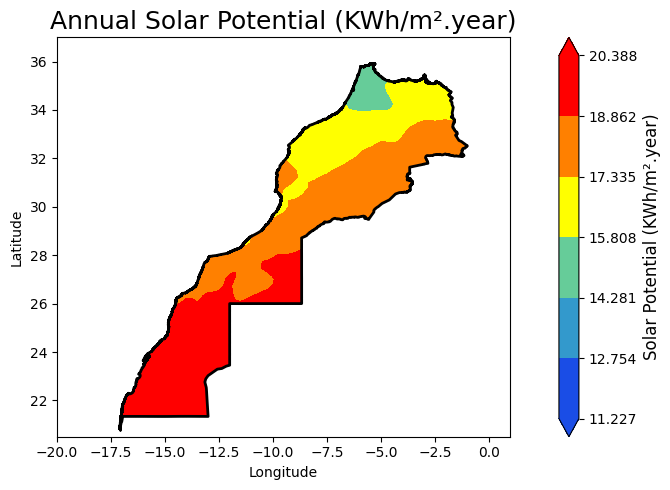

In [ ]:


# Define custom colormap
colors = [(0.1, 0.3, 0.9),    # Light Blue for low solar potential
          (0.2, 0.6, 0.8),
          (0.4, 0.8, 0.6),
          (0.7, 0.9, 0.3),
          (1, 1, 0),          # Yellow for moderate solar potential
          (1, 0.5, 0),        # Orange for moderate to high solar potential
          (1, 0, 0)]

cmap = ListedColormap(colors)


shapefile_path = "drive/MyDrive/data/maroc/"
maroc = gpd.read_file(shapefile_path, crs='EPSG:4326')


# Create plot with contourf
fig, axs = plt.subplots(1, 1, figsize=(10,5))
contour = axs.contourf(overall_annual_mean_potential['longitude'], overall_annual_mean_potential['latitude'], overall_annual_mean_potential,
                       levels=np.linspace(overall_annual_mean_potential.min(), overall_annual_mean_potential.max(), len(colors)),
                       cmap=cmap, extend='both')

# Add colorbar
cbar = plt.colorbar(contour, ax=axs)
cbar.set_label('Solar Potential (KWh/m².year)',fontsize=12)

# Set title and labels
axs.set_title("Annual Solar Potential (KWh/m².year)",fontsize=18)
axs.set_xlabel('Longitude')
axs.set_ylabel('Latitude')

# Add any additional features such as overlay shapefile, if needed
maroc.plot(ax=axs, color="white", edgecolor='black', linewidth=2)
axs.set_xlim(-20, 1)
axs.set_ylim(20.5, 37)

plt.tight_layout()
plt.show()


<ipython-input-8-621c38dcc0d4>:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


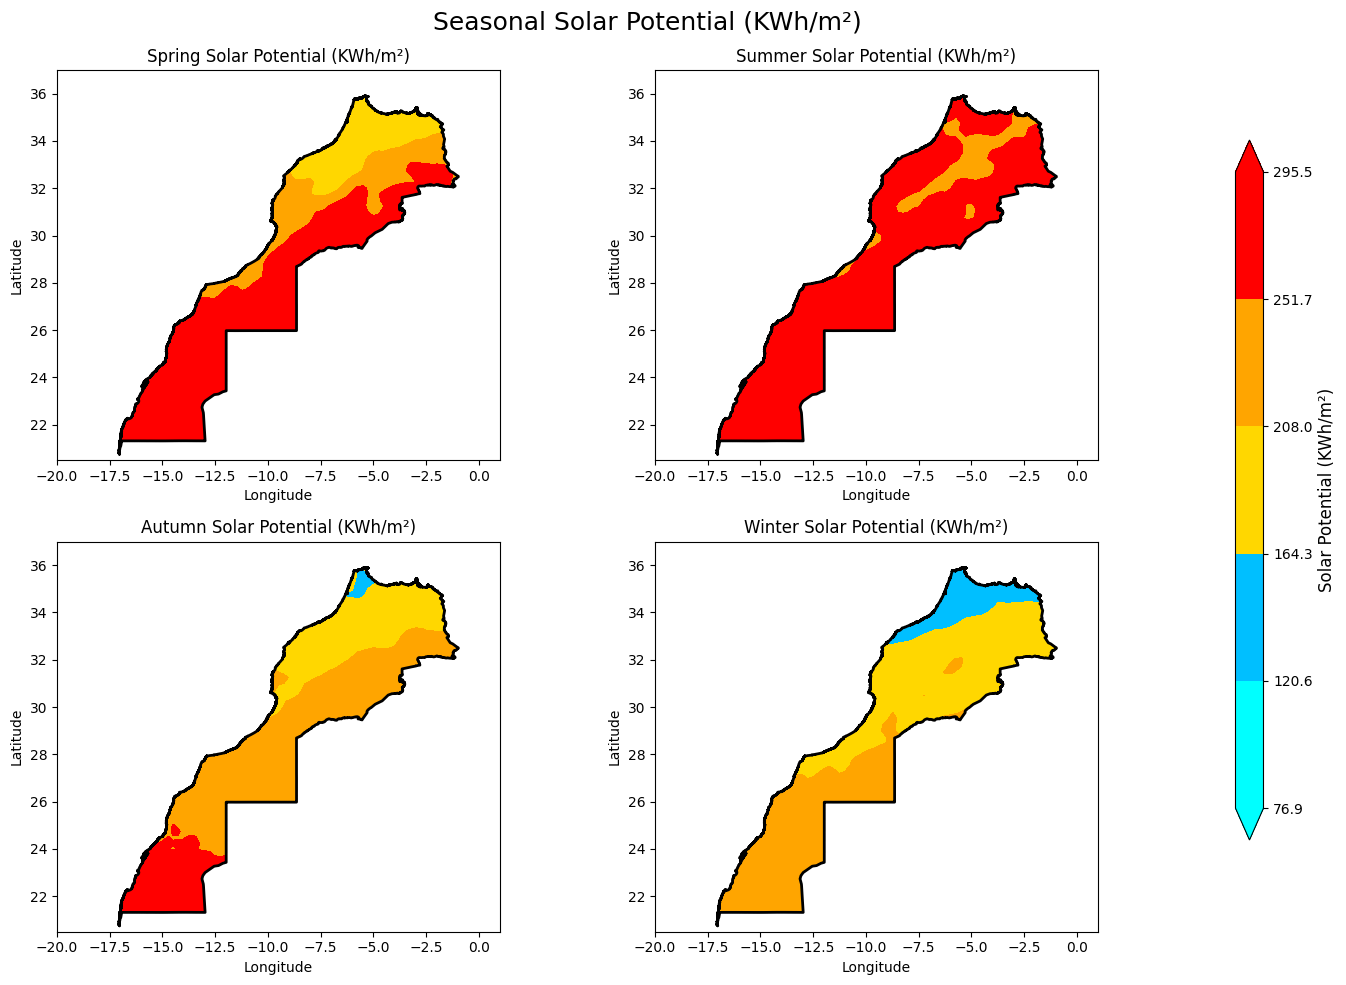

In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def P_sol_seasonal(I, u, v, T_a):
    # Same function as P_sol_annual, but for seasonal calculation
    eta_panel = 0.17
    gamma = -0.005
    W = np.sqrt(u**2 + v**2) # m/s
    IS = I # Convert to kWh
    h = 24 # hours in a day
    PR = 0.85
    Ai = 1
    ai = 1
    eta_LPV = 0.47
    T_stc = 25 # Celsius
    Ti = 4.3 + 0.943 * (T_a - 273.15) + 0.028 * (IS) / (21.6 * (10**3)) - 1.528 * W
    eta_PV = eta_panel * (1 + gamma * (Ti - T_stc))

    return (IS * h * Ai * ai * eta_LPV * eta_PV * PR) / (21.6 * (10**6)) # Convert to KWh

# Load daily data for the entire period using open_dataset
ds_irr = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_surface_solar_radiation_downwards_data_1979-2023.nc")
ds_temp = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_2m_temperature_data_1979-2023.nc")
ds_U1 = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_10m_u_component_of_wind_data_1979-2023.nc")
ds_V1 = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_10m_v_component_of_wind_data_1979-2023.nc")

# Select the desired variables
irr = ds_irr['ssrd']
temp = ds_temp['t2m']
U1 = ds_U1['u10']
V1 = ds_V1['v10']

# Calculate the seasonal solar potential
# Define seasons (You can adjust the months according to your definition of seasons)
spring_months = [3, 4, 5]  # March, April, May
summer_months = [6, 7, 8]  # June, July, August
autumn_months = [9, 10, 11]  # September, October, November
winter_months = [12, 1, 2]  # December, January, February

# Calculate seasonal potential for each season
seasonal_potentials = {}
for season, months in zip(['Spring', 'Summer', 'Autumn', 'Winter'], [spring_months, summer_months, autumn_months, winter_months]):
    seasonal_irr = irr.where(irr['time.month'].isin(months), drop=True)
    seasonal_temp = temp.where(temp['time.month'].isin(months), drop=True)
    seasonal_U1 = U1.where(U1['time.month'].isin(months), drop=True)
    seasonal_V1 = V1.where(V1['time.month'].isin(months), drop=True)

    daily_potential = P_sol_seasonal(seasonal_irr, seasonal_U1, seasonal_V1, seasonal_temp)
    seasonal_potentials[season] = daily_potential.sum(dim='time')

# Load shapefile of the country
shapefile_path = "drive/MyDrive/data/maroc/"
maroc = gpd.read_file(shapefile_path, crs='EPSG:4326')

# Define custom colormap with 20 homogeneous colors
colors = ['cyan', 'deepskyblue','yellow','gold', 'orange', 'red']
cmap = ListedColormap(colors)

# Create a 2x2 plot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axs = axs.ravel()

# Plot the mean potential for each season using contourf
for i, (season, potential) in enumerate(seasonal_potentials.items()):
    contour = axs[i].contourf(potential['longitude'], potential['latitude'], potential,
                              levels=np.linspace(potential.min(), potential.max(), len(colors)),
                              cmap=cmap, extend='both')
    axs[i].set_title(f"{season} Solar Potential (KWh/m²)")
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    maroc.plot(ax=axs[i], color="white", edgecolor='black', linewidth=2)
    axs[i].set_xlim(-20, 1)
    axs[i].set_ylim(20.5, 37)

# Add a single colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(contour, cax=cbar_ax, orientation='vertical')
cbar.set_label('Solar Potential (KWh/m²)',fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.subplots_adjust(top=0.92)
fig.suptitle('Seasonal Solar Potential (KWh/m²)', fontsize=18)
plt.show()


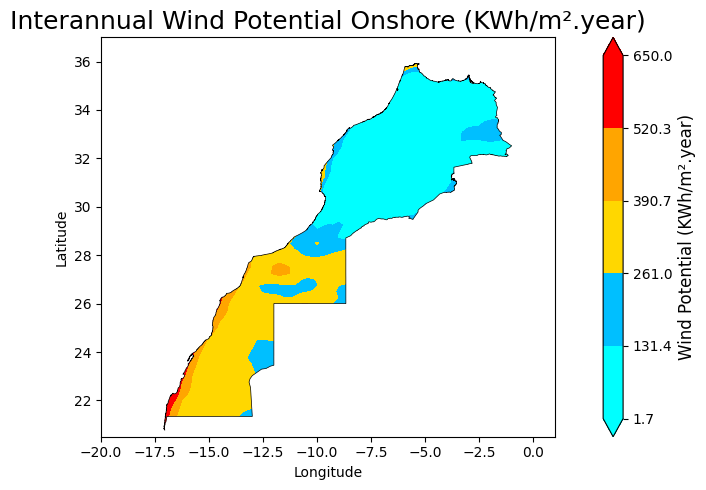

ValueError: x and y must have same first dimension, but have shapes (45,) and (1,)

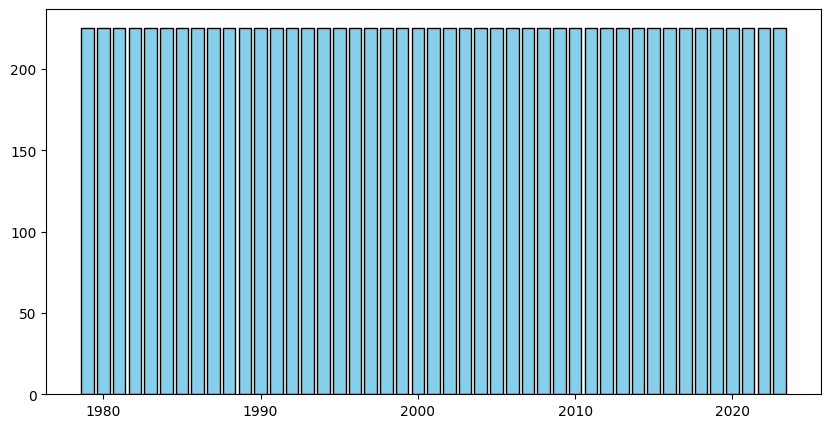

In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def P_wind(u, v):
    W = np.sqrt(u**2 + v**2)
    rho = 1.225
    return (0.5 * rho * W**3)

# Load wind data for the entire period
ds_u = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_100m_u_component_of_wind_data_1979-2023.nc")
ds_v = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_100m_v_component_of_wind_data_1979-2023.nc")

# Select the desired variables
u = ds_u['u100']
v = ds_v['v100']

# Calculate wind potential
wind_potential = P_wind(u, v)

# Calculate the annual sum
annual_wind_potential = wind_potential.mean(dim='time')

# Load shapefile of Morocco
shapefile_path = "drive/MyDrive/data/maroc/"
maroc = gpd.read_file(shapefile_path, crs='EPSG:4326')

# Define custom colormap with 20 homogeneous colors
colors = ['cyan', 'deepskyblue', 'yellow', 'gold', 'orange', 'red']
cmap = ListedColormap(colors)

# Create plot with contourf
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
contour = axs.contourf(annual_wind_potential['longitude'], annual_wind_potential['latitude'], annual_wind_potential,
                       levels=np.linspace(annual_wind_potential.min(), 650, len(colors)),
                       cmap=cmap, extend='both') # same thing with the potential offshore, change 650 by the maximum

# Add colorbar
cbar = plt.colorbar(contour, ax=axs)
cbar.set_label('Wind Potential (KWh/m².year)', fontsize=12)

# Set title and labels
axs.set_title("Interannual Wind Potential Onshore (KWh/m².year)", fontsize=18)
axs.set_xlabel('Longitude')
axs.set_ylabel('Latitude')
axs.set_xlim(-20, 1)
axs.set_ylim(20.5, 37)
# Add the mask of Morocco
maroc.plot(ax=axs, color="white", edgecolor='black', linewidth=0.5) #same thing with the potential offshore, change "white" by none

plt.tight_layout()
plt.show()




Plotting DJF Wind Potential
Potential shape: (141, 141)
Longitude range: -20.0 15.0
Latitude range: 10.0 45.0
Plotting JJA Wind Potential
Potential shape: (141, 141)
Longitude range: -20.0 15.0
Latitude range: 10.0 45.0
Plotting MAM Wind Potential
Potential shape: (141, 141)
Longitude range: -20.0 15.0
Latitude range: 10.0 45.0
Plotting SON Wind Potential
Potential shape: (141, 141)
Longitude range: -20.0 15.0
Latitude range: 10.0 45.0


<ipython-input-6-be61eae3835e>:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


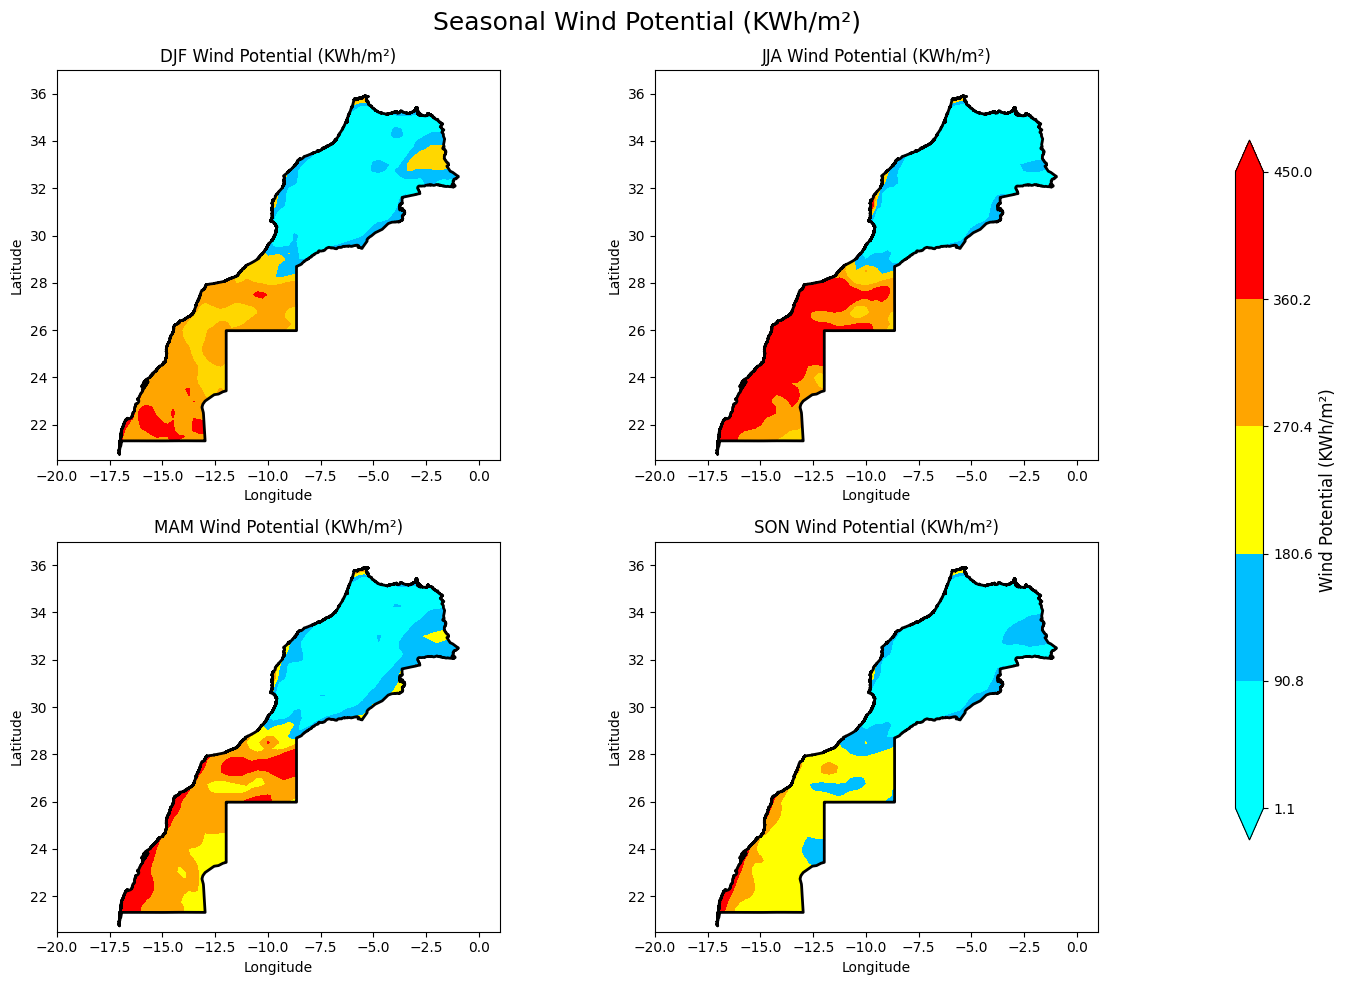

In [ ]:
import xarray as xr
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def P_wind(u, v):
    W = np.sqrt(u**2 + v**2)
    rho = 1.225
    return (0.5 * rho * W**3)

# Load wind data for the entire period
ds_u = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_100m_u_component_of_wind_data_1979-2023.nc")
ds_v = xr.open_dataset("drive/MyDrive/data/daily_data/era5_daily_100m_v_component_of_wind_data_1979-2023.nc")

# Select the desired variables
u = ds_u['u100']
v = ds_v['v100']

# Calculate wind potential
wind_potential = P_wind(u, v)

# Resample data to seasonal frequency (DJF, MAM, JJA, SON)
seasonal_wind_potential = wind_potential.groupby('time.season').mean(dim='time')

# Load shapefile of Morocco
shapefile_path = "drive/MyDrive/data/maroc/"
maroc = gpd.read_file(shapefile_path, crs='EPSG:4326')

# Define custom colormap with 20 homogeneous colors
colors = ['cyan', 'deepskyblue', 'yellow', 'gold', 'orange', 'red']
cmap = ListedColormap(colors)
# Plot seasonal wind potential map
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy iteration
axs = axs.ravel()

# Plot the mean potential for each season using contourf
for i, (season, potential) in enumerate(seasonal_wind_potential.groupby('season')):
    print(f"Plotting {season} Wind Potential")
    print("Potential shape:", potential.shape)
    print("Longitude range:", potential['longitude'].min().values, potential['longitude'].max().values)
    print("Latitude range:", potential['latitude'].min().values, potential['latitude'].max().values)

    contour = axs[i].contourf(potential['longitude'], potential['latitude'], potential,
                              levels=np.linspace(potential.min(), 450, len(colors)),
                              cmap=cmap, extend='both') # same thing with the potential offshore, change 450 by the maximum
    axs[i].set_title(f"{season} Wind Potential (KWh/m²)")
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    maroc.plot(ax=axs[i], color="white", edgecolor='black', linewidth=2) #same thing with the potential offshore, change "white" by none
    axs[i].set_xlim(-20, 1)
    axs[i].set_ylim(20.5, 37)

# Add a single colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = plt.colorbar(contour, cax=cbar_ax, orientation='vertical')
cbar.set_label('Wind Potential (KWh/m²)',fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.subplots_adjust(top=0.92)
fig.suptitle('Seasonal Wind Potential (KWh/m²)', fontsize=18)
plt.show()
